In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [70]:
#Fetch Images count from Fodlers

In [9]:
import os

count = 0
dirs = os.listdir(r'C:\My\images')

for dir in dirs:
    # Join the directory path and avoid missing slashes
    dir_path = os.path.join(r'C:\My\images', dir)
    
    # Check if it's a directory (to avoid error if there are non-directory files)
    if os.path.isdir(dir_path):
        files = list(os.listdir(dir_path))
        print(f"{dir} Folder has {len(files)} Images")
        count += len(files)

print(f"Images Folder has {count} Images")


daisy Folder has 764 Images
dandelion Folder has 207 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 826 Images
Images Folder has 3314 Images


In [72]:
#Load Images into Arrays as Dataset

In [10]:
base_dir = r'C:\My\images'
img_size = 180
batch = 32

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3314 files belonging to 5 classes.
Using 2652 files for training.
Found 3314 files belonging to 5 classes.
Using 662 files for validation.


In [13]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [14]:
import matplotlib.pyplot as plt

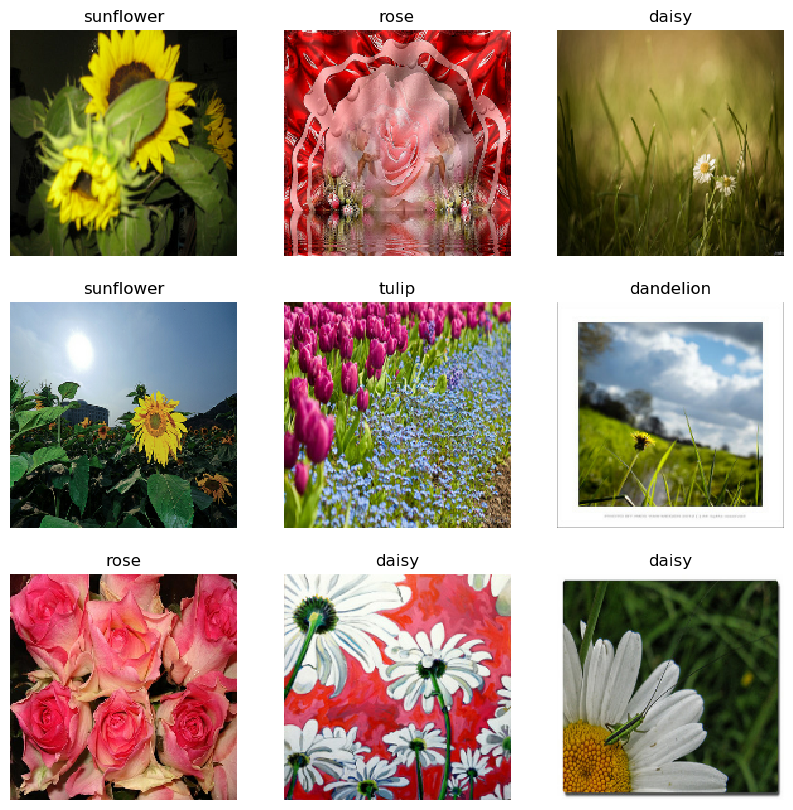

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [18]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [81]:
#Data Augmentation

In [19]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

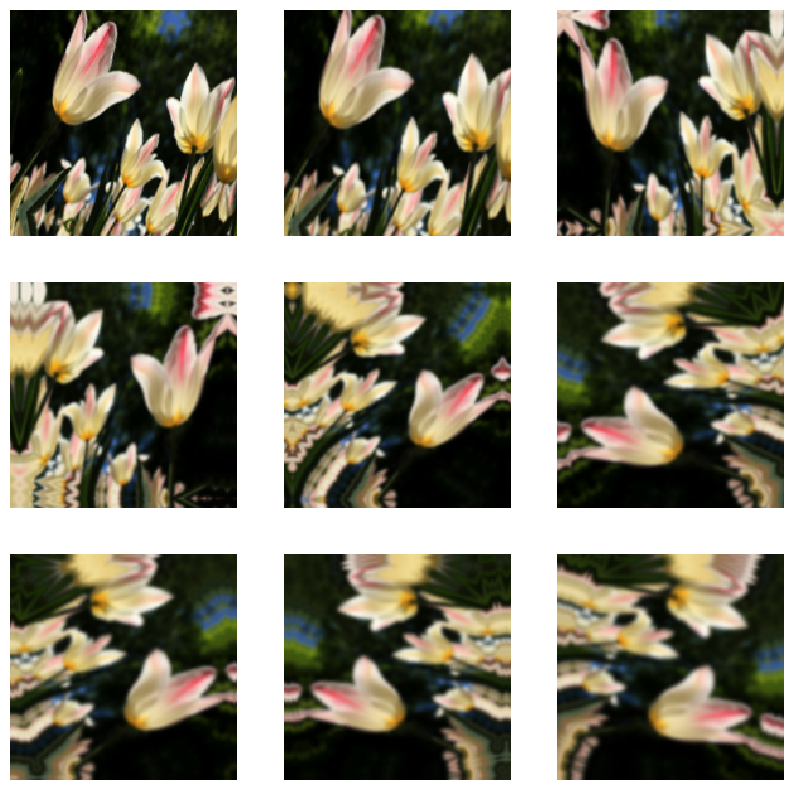

In [21]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [84]:
#MOdel Creation

In [22]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [36]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
83/83 [==============================] - 53s 608ms/step - loss: 1.3720 - accuracy: 0.4427 - val_loss: 1.0774 - val_accuracy: 0.5801
Epoch 2/15
83/83 [==============================] - 49s 596ms/step - loss: 1.0468 - accuracy: 0.5890 - val_loss: 0.9720 - val_accuracy: 0.6042
Epoch 3/15
83/83 [==============================] - 50s 602ms/step - loss: 0.9860 - accuracy: 0.6044 - val_loss: 0.9661 - val_accuracy: 0.6208
Epoch 4/15
83/83 [==============================] - 49s 585ms/step - loss: 0.9041 - accuracy: 0.6418 - val_loss: 0.9212 - val_accuracy: 0.6208
Epoch 5/15
83/83 [==============================] - 47s 568ms/step - loss: 0.8681 - accuracy: 0.6618 - val_loss: 0.8882 - val_accuracy: 0.6405
Epoch 6/15
83/83 [==============================] - 48s 576ms/step - loss: 0.8243 - accuracy: 0.6806 - val_loss: 0.8279 - val_accuracy: 0.6511
Epoch 7/15
83/83 [==============================] - 46s 552ms/step - loss: 0.7629 - accuracy: 0.7093 - val_loss: 0.8184 - val_accuracy: 0.6616

In [ ]:
# def classify_images(image_path):
#     input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
#     input_image_array = tf.keras.utils.img_to_array(input_image)
#     input_image_exp_dim = tf.expand_dims(input_image_array,0)

#     predictions = model.predict(input_image_exp_dim)
#     result = tf.nn.softmax(predictions[0])
#     outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
#     return outcome

In [12]:
# classify_images('C:\My\sample images\tulip.jpg')
# 

In [15]:
import os

# Directory where files will be uploaded
upload_dir = 'upload'

# Check if the 'upload' directory exists, if not, create it
if not os.path.exists(upload_dir):
    os.makedirs(upload_dir)

# Assuming you're getting the uploaded file in a variable, like 'uploaded_file' in Streamlit
# Example: Streamlit file uploader widget (you can replace this part with your own file upload method)
import streamlit as st
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Save the file to the 'upload' directory
    with open(os.path.join(upload_dir, uploaded_file.name), 'wb') as f:
        # Write the uploaded file content to the file
        f.write(uploaded_file.getbuffer())

    # Now, you can call your classify_images function here, for example:
    image_path = os.path.join(upload_dir, uploaded_file.name)
    result = classify_images(image_path)
    st.write(result)  # Show the classification result in the Streamlit app


2025-02-18 21:34:44.136 
  command:

    streamlit run C:\Users\MARIMUTHU\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [16]:
import tensorflow as tf
import numpy as np

# Load the trained model (update the path as needed)
model = tf.keras.models.load_model('Flower_Recog_Model.h5')

# Define flower class names (make sure they match the order of your output classes)
flower_names = ['rose', 'tulip', 'sunflower']  # Example, modify according to your classes

# Function to classify images
def classify_images(image_path):
    # Load and preprocess the image
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Expand dimension to match model input

    # Make predictions using the model
    predictions = model.predict(input_image_exp_dim)
    
    # Apply softmax to the predictions (in case they are raw logits)
    result = tf.nn.softmax(predictions[0])

    # Get the class with the highest score
    predicted_class = flower_names[np.argmax(result)]
    confidence_score = np.max(result) * 100  # Multiply by 100 to get percentage

    # Return the result as a string
    outcome = f'The image belongs to {predicted_class} with a score of {confidence_score:.2f}%'
    return outcome

# Example usage
image_path = r'C:\My\sample images\daisy.jpg'  # Replace with the path to your image
result = classify_images(image_path)
print(result)


1/1 [==============================] - 0s 226ms/step
The image belongs to rose with a score of 98.36%


In [17]:
model.save('Flower_Recog_Model.h5')